In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
# ------------------------------
# CONFIGURACIÓN Y BUENAS PRÁCTICAS
# ------------------------------
pd.set_option('display.max_columns', None)

# Definir rutas de los archivos de datos
csv_path = r"G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\data\bank-additional.csv"
excel_path = r"G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\data\customer-details.xlsx"
backup_path = "backup/"

# Crear carpeta de respaldo si no existe
os.makedirs(backup_path, exist_ok=True)

In [73]:
# ------------------------------
# CARGA DE DATOS CON CONTROL DE ERRORES Y CORRECCIÓN DE FORMATO
# ------------------------------
def load_bank_data(path):
    try:
        print("\n📌 Cargando datos de marketing...")
        bank_df = pd.read_csv(path, sep=None, engine='python', skipinitialspace=True)
        bank_df.columns = bank_df.columns.str.strip().str.replace(',', '').str.replace(' ', '_')
        print("✅ Datos de marketing cargados correctamente con columnas corregidas.")
        return bank_df
    except Exception as e:
        raise Exception(f"❌ ERROR al cargar datos de marketing: {e}")

def load_customer_data(path):
    try:
        print("\n📌 Verificando hojas disponibles en el archivo Excel...")
        xls = pd.ExcelFile(path)
        if all(sheet in xls.sheet_names for sheet in ['2012', '2013', '2014']):
            customer_data = [pd.read_excel(path, sheet_name=sheet) for sheet in ['2012', '2013', '2014']]
            print("✅ Datos de clientes cargados correctamente.")
            return customer_data
        else:
            raise Exception("❌ ERROR: No se encontraron las hojas esperadas (2012, 2013, 2014) en el archivo Excel.")
    except Exception as e:
        raise Exception(f"❌ ERROR al cargar datos de clientes: {e}")

# Cargar los datos
bank_df = load_bank_data(csv_path)
customer_dfs = load_customer_data(excel_path)


📌 Cargando datos de marketing...
✅ Datos de marketing cargados correctamente con columnas corregidas.

📌 Verificando hojas disponibles en el archivo Excel...
✅ Datos de clientes cargados correctamente.


In [83]:
# Crear copias de seguridad de los datos originales
for i, year in enumerate(['2012', '2013', '2014']):
    customer_dfs[i].to_csv(os.path.join(backup_path, f"customer_{year}_backup.csv"), index=False)

bank_df.to_csv(os.path.join(backup_path, "bank_backup.csv"), index=False)
print("✅ Copias de seguridad creadas en 'backup/'.")

✅ Copias de seguridad creadas en 'backup/'.


In [75]:
# ------------------------------
# UNIFICACIÓN DE DATOS
# ------------------------------
customer_df = pd.concat(customer_dfs, ignore_index=True)

# Asegurar que las columnas estén bien definidas
bank_df.columns = bank_df.columns.str.strip()
customer_df.columns = customer_df.columns.str.strip()

if 'ID' in customer_df.columns:
    customer_df.rename(columns={'ID': 'id_'}, inplace=True)

merged_df = pd.merge(bank_df, customer_df, on='id_', how='left')
print("✅ Datos fusionados correctamente.")

✅ Datos fusionados correctamente.


In [76]:
# ------------------------------
# ANÁLISIS DESCRIPTIVO INICIAL
# ------------------------------
print("📊 Análisis Descriptivo del DataFrame:")
print(merged_df.describe())
print("\nInformación del DataFrame:")
print(merged_df.info())
print("\nValores Nulos en cada columna:")
print(merged_df.isnull().sum())

📊 Análisis Descriptivo del DataFrame:
         Unnamed:_0           age       default       housing          loan  \
count  43000.000000  37880.000000  34019.000000  41974.000000  41974.000000   
mean   20651.099047     39.977112      0.000088      0.535998      0.155620   
min        0.000000     17.000000      0.000000      0.000000      0.000000   
25%    10381.750000     32.000000      0.000000      0.000000      0.000000   
50%    20642.500000     38.000000      0.000000      1.000000      0.000000   
75%    30930.250000     47.000000      0.000000      1.000000      0.000000   
max    41187.000000     98.000000      1.000000      1.000000      1.000000   
std    11868.770913     10.437957      0.009390      0.498708      0.362499   

           duration      campaign         pdays      previous  emp.var.rate  \
count  43000.000000  43000.000000  43000.000000  43000.000000  43000.000000   
mean     257.739279      2.567233    962.330953      0.174023      0.077128   
min        0.

✅ Filas con valores nulos eliminadas.


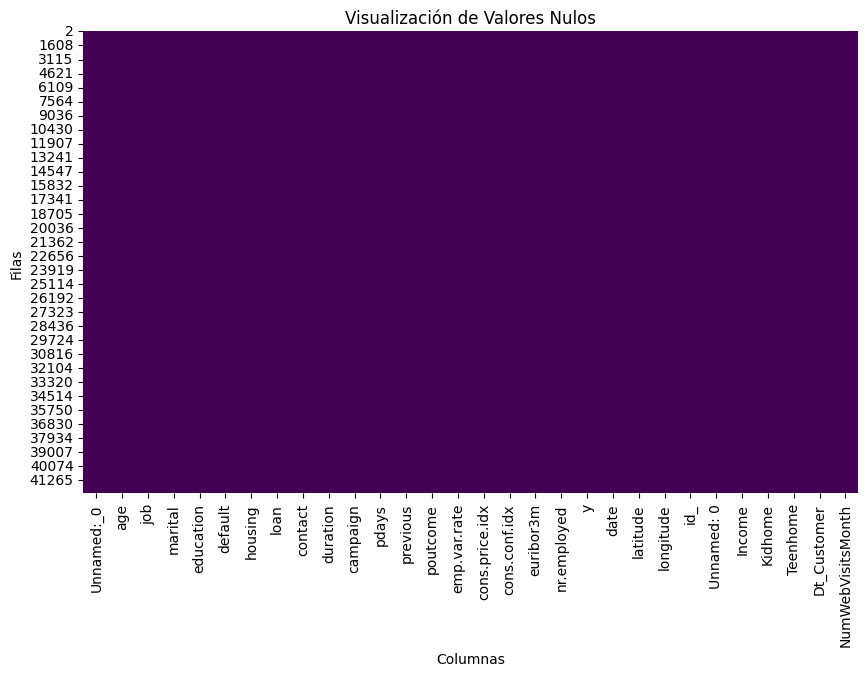

In [77]:
# ------------------------------
# MANEJO DE VALORES NULOS
# ------------------------------
# Opción: Eliminación de filas con valores nulos
merged_df.dropna(inplace=True)
print("✅ Filas con valores nulos eliminadas.")

# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

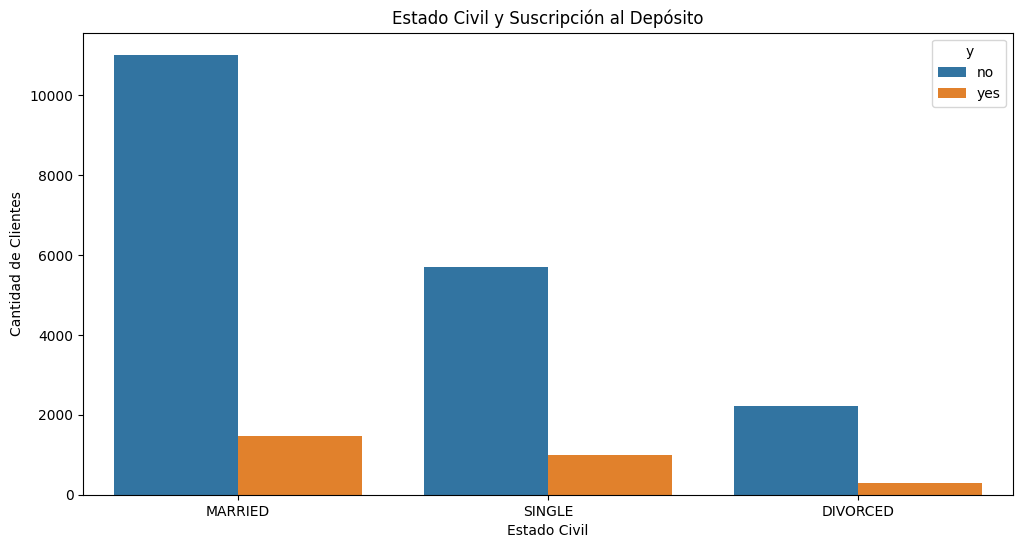

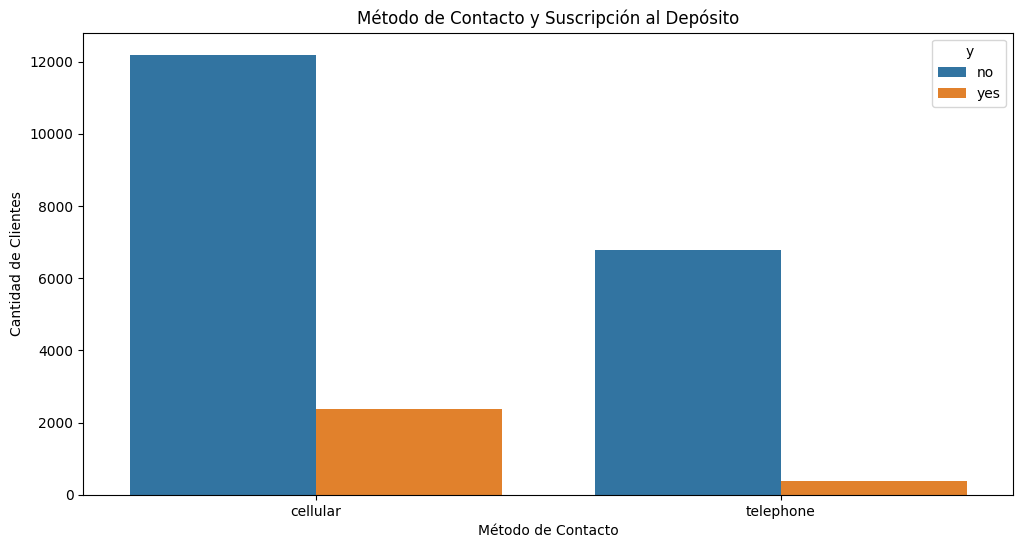

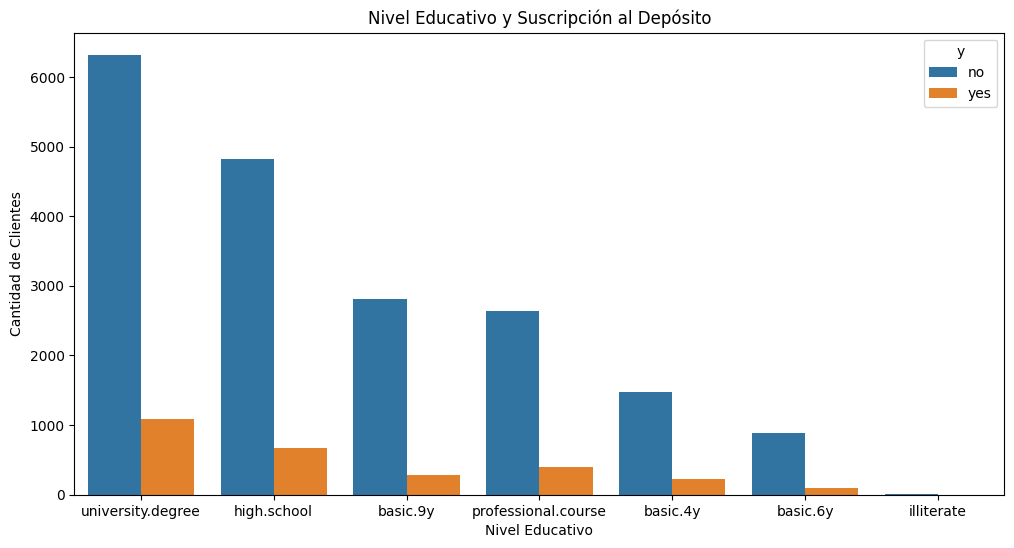

In [78]:
# ------------------------------
# ANÁLISIS ADICIONAL DE RELACIONES ENTRE VARIABLES
# ------------------------------
def plot_countplot(x, hue, data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x, hue=hue, data=data, order=data[x].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Estado civil y suscripción
plot_countplot('marital', 'y', merged_df, 'Estado Civil y Suscripción al Depósito', 'Estado Civil', 'Cantidad de Clientes')

# Tipo de contacto y éxito
plot_countplot('contact', 'y', merged_df, 'Método de Contacto y Suscripción al Depósito', 'Método de Contacto', 'Cantidad de Clientes')

# Nivel educativo y suscripción
plot_countplot('education', 'y', merged_df, 'Nivel Educativo y Suscripción al Depósito', 'Nivel Educativo', 'Cantidad de Clientes')

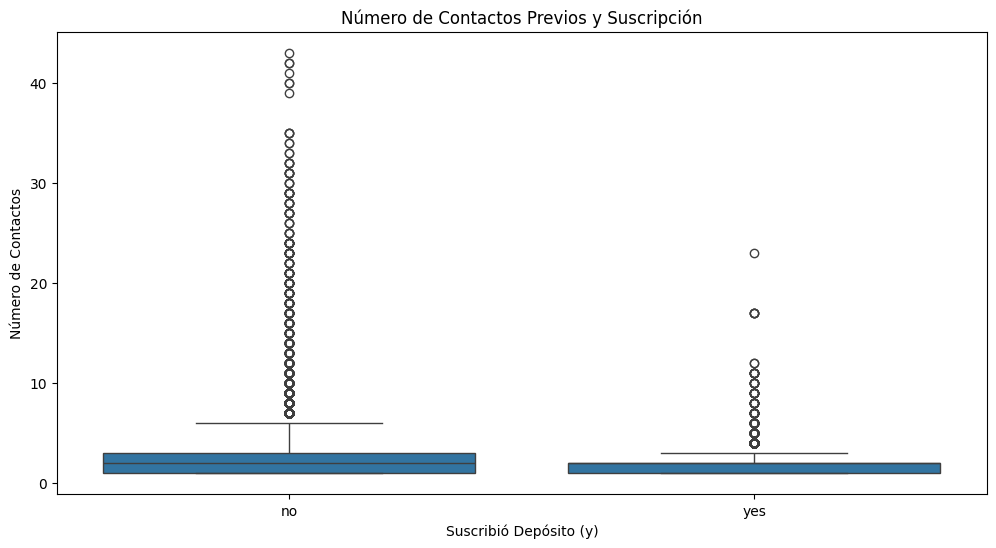

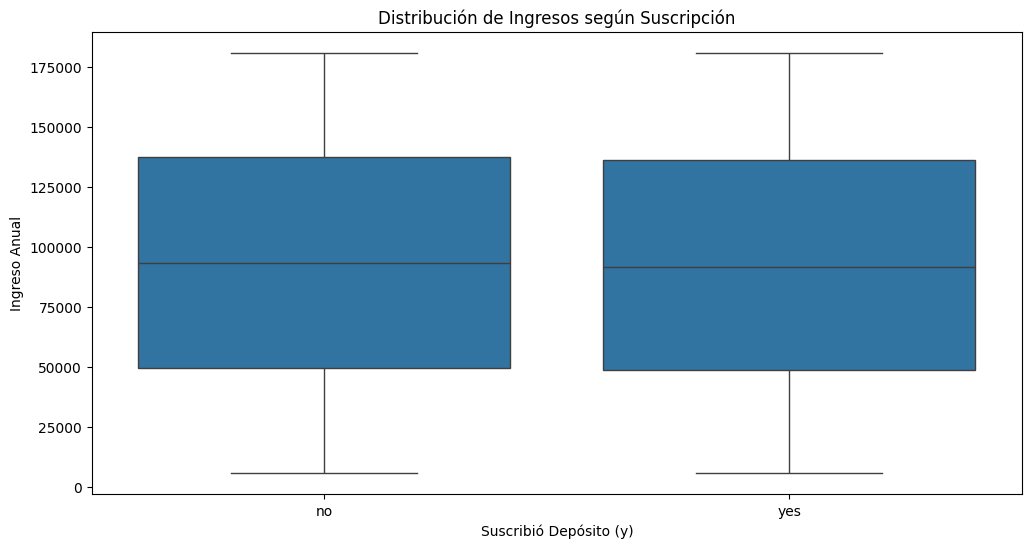

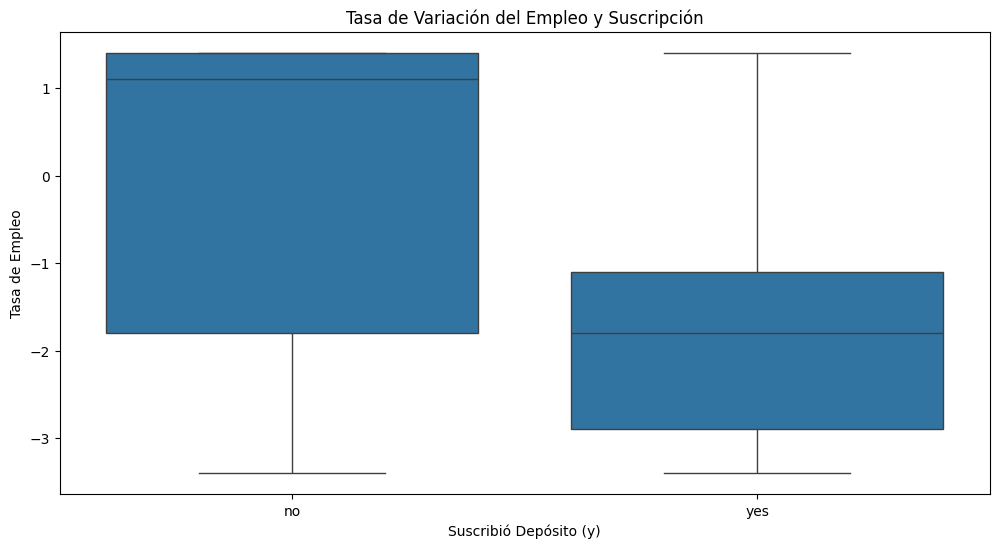

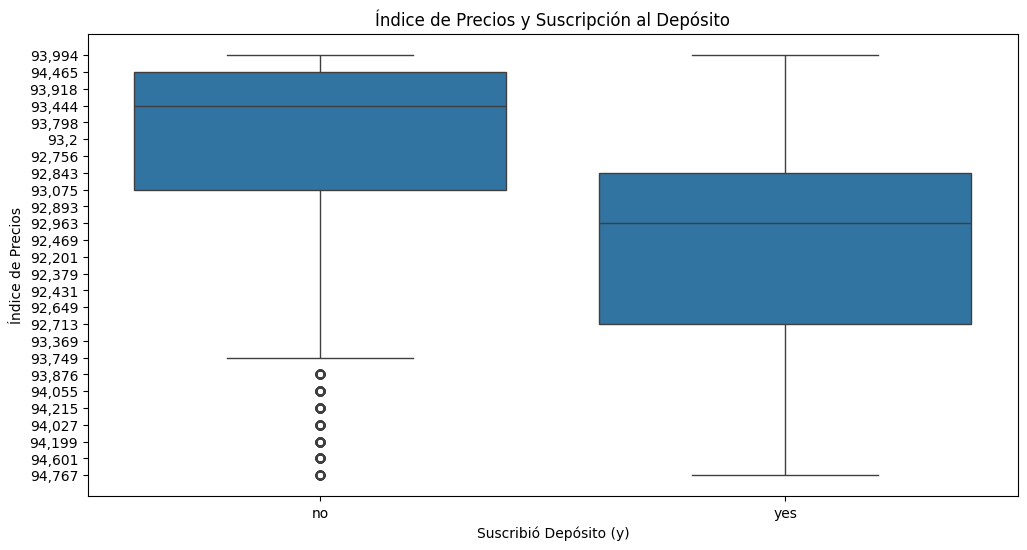

In [79]:
def plot_boxplot(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Número de contactos previos y éxito
plot_boxplot('y', 'campaign', merged_df, 'Número de Contactos Previos y Suscripción', 'Suscribió Depósito (y)', 'Número de Contactos')

# Relación entre ingresos y suscripción
plot_boxplot('y', 'Income', merged_df, 'Distribución de Ingresos según Suscripción', 'Suscribió Depósito (y)', 'Ingreso Anual')

# Tasa de empleo y suscripción
plot_boxplot('y', 'emp.var.rate', merged_df, 'Tasa de Variación del Empleo y Suscripción', 'Suscribió Depósito (y)', 'Tasa de Empleo')

# Índice de precios y suscripción
plot_boxplot('y', 'cons.price.idx', merged_df, 'Índice de Precios y Suscripción al Depósito', 'Suscribió Depósito (y)', 'Índice de Precios')

In [80]:
# Conclusiones
print("✅ Análisis exploratorio de datos completado con nuevas relaciones.")

✅ Análisis exploratorio de datos completado con nuevas relaciones.
